In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
from wordcloud import WordCloud
from requests import get
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import acquire
import prepare
from sklearn.model_selection import train_test_split

In [2]:
df = prepare.git_df()

In [3]:
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,mysql redis mongodb zookeeper nginx sqrt sqrt ...
1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,vrayn vray client window support xray core com...
2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,logo logo secondsofcod orgjsp second code shor...
3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,aligncenter srchttps jsdelivr netghxueweih ani...
4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status comairblader iactionswork flowsma...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,spdx filecopyrigh ttext yuzu emulator project ...
596,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal changelog shield iogithubrele asezealdocs...
597,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,pytorch pytorch handbook pytorch pytorch logo ...
598,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             600 non-null    object
 1   language         600 non-null    object
 2   original         600 non-null    object
 3   clean            600 non-null    object
 4   stemmed          600 non-null    object
 5   lemmatized       600 non-null    object
 6   original_length  600 non-null    int64 
 7   true_clean       600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


In [6]:
df.language = df.language.str.lower()

In [7]:
df.language.value_counts()

php                 108
c++                 107
python              106
c                   102
html                 83
javascript           20
java                 20
jupyter notebook     20
c#                   18
typescript           16
Name: language, dtype: int64

In [8]:
df.language = df.language.str.replace('javascript','other').str.replace('java','other').str.replace('c#','other').str.replace('typescript','other').str.replace('jupyter notebook','other')
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,mysql redis mongodb zookeeper nginx sqrt sqrt ...
1,2dust/v2rayN,other,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,vrayn vray client window support xray core com...
2,30-seconds/30-seconds-of-code,other,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,logo logo secondsofcod orgjsp second code shor...
3,521xueweihan/HelloGitHub,python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,aligncenter srchttps jsdelivr netghxueweih ani...
4,Airblader/i3,c,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status comairblader iactionswork flowsma...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,c++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,spdx filecopyrigh ttext yuzu emulator project ...
596,zealdocs/zeal,c++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal changelog shield iogithubrele asezealdocs...
597,zergtant/pytorch-handbook,other,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,pytorch pytorch handbook pytorch pytorch logo ...
598,zero-to-mastery/start-here-guidelines,python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [9]:
def split_data(df, column):
    '''This function takes in two arguments, a dataframe and a string. The string argument is the name of the
        column that will be used to stratify the train_test_split. The function returns three dataframes, a 
        training dataframe with 60 percent of the data, a validate dataframe with 20 percent of the data and test
        dataframe with 20 percent of the data.'''
    train, test = train_test_split(df, test_size=.2, random_state=217, stratify=df[column])
    train, validate = train_test_split(train, test_size=.25, random_state=217, stratify=train[column])
    return train, validate, test

In [10]:
train, validate, test = split_data(df, 'language')

In [11]:
ADDITIONAL_STOPWORDS = ['yes']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
python_words = clean(' '.join(train[train.language == 'python']['true_clean']))
c_words = clean(' '.join(train[train.language == 'c']['true_clean']))
php_words = clean(' '.join(train[train.language == 'php']['true_clean']))
cplus_words = clean(' '.join(train[train.language == 'c++']['true_clean']))
html_words = clean(' '.join(train[train.language == 'html']['true_clean']))
other_words = clean(' '.join(train[train.language == 'other']['true_clean']))
all_words = clean(' '.join(train['true_clean']))

In [14]:
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
php_freq = pd.Series(php_words).value_counts()
cplus_freq = pd.Series(cplus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [101]:
python_freq = python_freq[python_freq > 2]
python_freq

python          1393
file             662
code             546
star             527
model            405
                ... 
excellent          3
resourceslin       3
orgprojectsb       3
boto               3
comjazzbandd       3
Length: 4367, dtype: int64

In [102]:
php_freq = php_freq[php_freq > 2]
php_freq

value           209
file            198
client          182
opencollecti    176
security        175
               ... 
invalidargum      3
implementing      3
amount            3
comblueimpja      3
ingcase           3
Length: 2121, dtype: int64

In [103]:
cplus_freq = cplus_freq[cplus_freq > 2]
cplus_freq

leetcode        568
algorithmscp    520
build           381
medium          303
install         229
               ... 
reset             3
prop              3
aarchlastcom      3
rectory           3
pjumpgamejum      3
Length: 2878, dtype: int64

In [104]:
c_freq = c_freq[c_freq > 2]
c_freq

example         365
node            325
file            316
build           314
message         256
               ... 
leetcode          3
specifying        3
timescaledba      3
closely           3
slide             3
Length: 2535, dtype: int64

In [105]:
html_freq = html_freq[html_freq > 2]
html_freq

heavy           1714
minus           1711
sign            1710
youtube          723
lecture          417
                ... 
outside            3
myform             3
listplyqspqz       3
scrollpagetr       3
expect             3
Length: 2020, dtype: int64

In [106]:
other_freq = other_freq[other_freq > 2]
other_freq

hrefhttps       825
srchttps        635
ipynb           603
opencollecti    600
efalse          524
               ... 
waterfall         3
perform           3
chksmfaeeccd      3
describes         3
linuxmacwind      3
Length: 3277, dtype: int64

In [107]:
all_freq = all_freq[all_freq > 2]
all_freq

python          1809
sign            1742
heavy           1720
minus           1714
file            1692
                ... 
nleft              3
keil               3
cominsinnwb        3
englishseman       3
esearchhydra       3
Length: 10843, dtype: int64

In [108]:
word_counts = pd.concat([python_freq, c_freq, php_freq, cplus_freq, html_freq, other_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['python','c','php','cplus','html','other','all']
word_counts.head()

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
file,662,316,198,227,123,166,1692
code,546,198,149,211,155,301,1560
star,527,0,8,6,11,9,563
model,405,15,71,62,46,190,789


In [109]:
word_counts.sort_values('all', ascending=False)

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
sign,8,0,6,8,1710,9,1742
heavy,3,0,0,0,1714,0,1720
minus,0,0,0,0,1711,0,1714
file,662,316,198,227,123,166,1692
...,...,...,...,...,...,...,...
pbinarytreep,0,0,0,3,0,0,3
comapolloaut,0,0,0,3,0,0,3
ptwosumtwosu,0,0,0,3,0,0,3
libqtsvg,0,0,0,3,0,0,3


<AxesSubplot:>

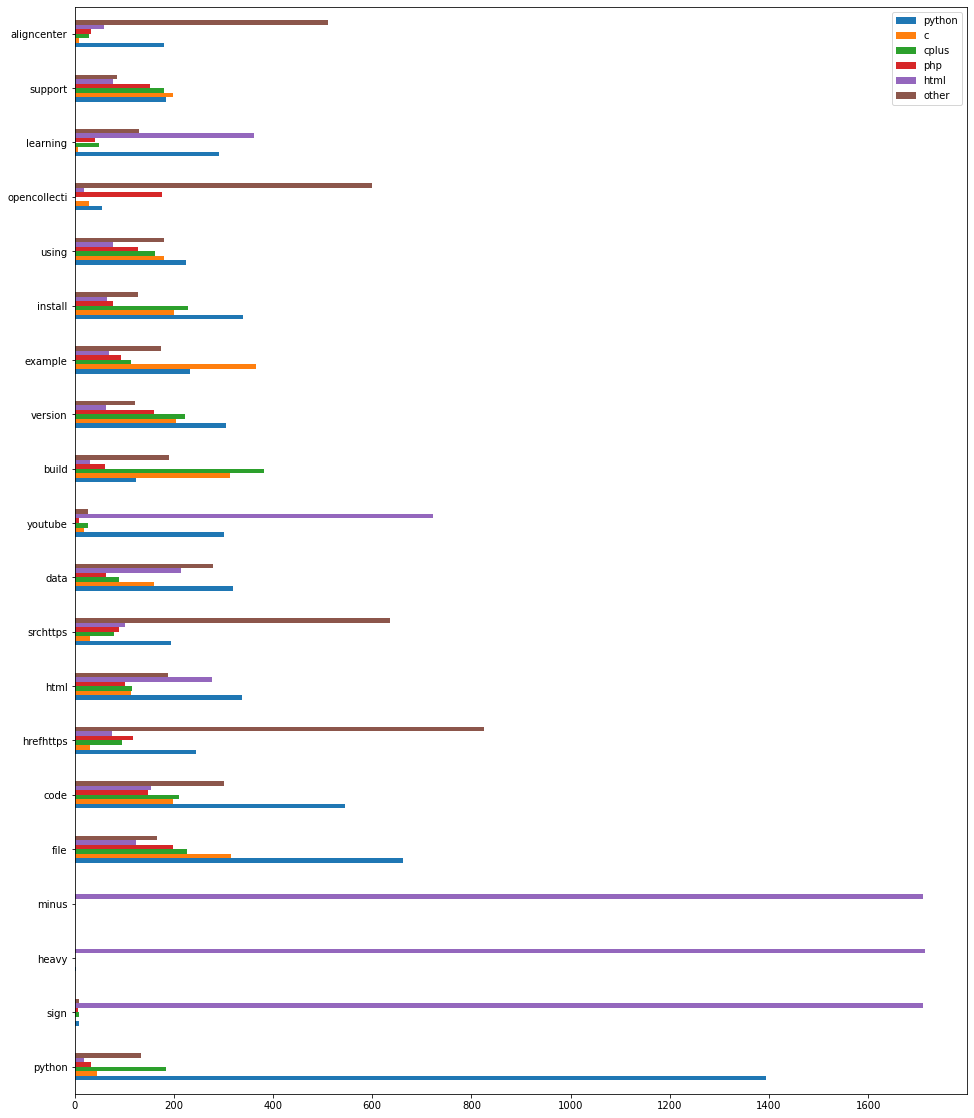

In [110]:
word_counts.sort_values(
    'all', ascending=False
)[['python','c','cplus','php','html','other']].head(20).plot.barh(figsize=[16,20])

<AxesSubplot:>

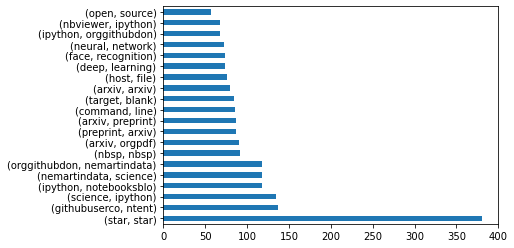

In [111]:
pd.Series(nltk.bigrams(python_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

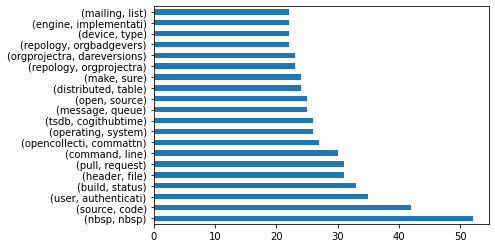

In [112]:
pd.Series(nltk.bigrams(c_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

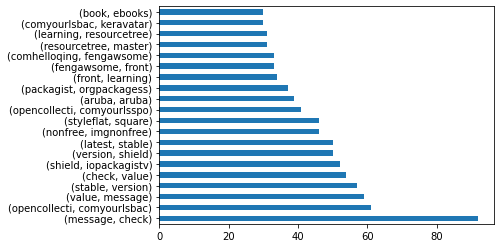

In [113]:
pd.Series(nltk.bigrams(php_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

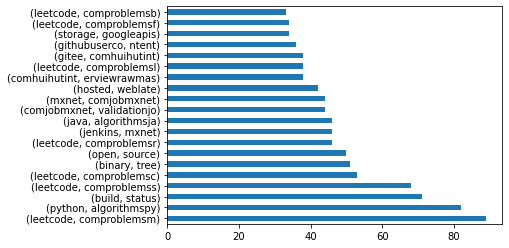

In [114]:
pd.Series(nltk.bigrams(cplus_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

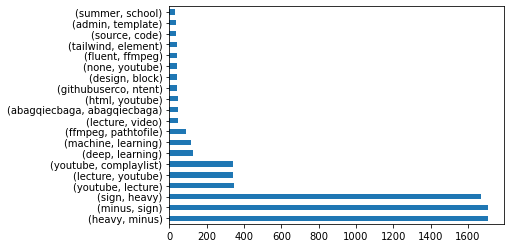

In [115]:
pd.Series(nltk.bigrams(html_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

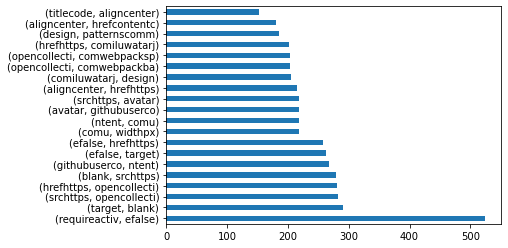

In [116]:
pd.Series(nltk.bigrams(other_words)
         ).value_counts().head(20).plot.barh()

In [117]:
train.language.value_counts()

c++       65
python    64
php       64
c         61
other     56
html      50
Name: language, dtype: int64

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(word_counts.index)

In [119]:
bag_of_words

<10843x10843 sparse matrix of type '<class 'numpy.int64'>'
	with 10843 stored elements in Compressed Sparse Row format>

In [120]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [121]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [122]:
bow

,aaaaaocayaaa,aansuheugaaa,aarch,aarchlastcom,aaron,aatwebsiteex,abagqiecbaga,abbeel,abbr,abcde,...,zsbxaaaaaaad,zsjbvegfwlze,zstandard,zurich,zwdpbjiuiibp,zwsuqinhtcck,zypper,zyte,zzle,zzndb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
bow.apply(lambda row: row / row.sum(), axis=1)

,aaaaaocayaaa,aansuheugaaa,aarch,aarchlastcom,aaron,aatwebsiteex,abagqiecbaga,abbeel,abbr,abcde,...,zsbxaaaaaaad,zsjbvegfwlze,zstandard,zurich,zwdpbjiuiibp,zwsuqinhtcck,zypper,zyte,zzle,zzndb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.true_clean)
pd.DataFrame(bag_of_words.todense(), 
             columns=tfidf.get_feature_names_out())

,aaaa,aaaaaelftksu,aaaaaocayaaa,aaaabaaaa,aaacb,aaafddcaadaa,aaai,aabdbcefcfce,aabmeetings,aacdbfeaaafd,...,zxvf,zydis,zygisk,zykmlzcrqz,zypper,zyte,zzkxkxcqxaaa,zzle,zzleguzzleci,zzndb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indeces, and the values into values
pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

aaaa            6.195731
aaaaaelftksu    6.195731
aaaaaocayaaa    6.195731
aaaabaaaa       6.195731
aaacb           6.195731
                  ...   
zyte            6.195731
zzkxkxcqxaaa    6.195731
zzle            6.195731
zzleguzzleci    6.195731
zzndb           6.195731
Length: 43503, dtype: float64

In [135]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_grams = cv.fit_transform(train.true_clean)

In [136]:
pd.DataFrame(bag_of_grams.todense(),
            columns=cv.get_feature_names())

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa record,aaaaaelftksu qmcc,aaaaaocayaaa afscraaaagxr,aaaabaaaa gatewayapi,aaacb afdabd,aaafddcaadaa effeeaeaf,aaai spring,aabdbcefcfce fbresearchin,aabmeetings june,aacdbfeaaafd cecddefefb,...,zypper spdlog,zyte check,zyte company,zyte formerly,zyte zyte,zzkxkxcqxaaa yjqbzr,zzle guzzlehttp,zzle version,zzleguzzleci labelci,zzndb qvrayqvray
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language

In [130]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.6361111111111111

In [131]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_validate)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_bow, y_validate)
tree.score(X_bow, y_validate)

0.75

In [132]:
pd.Series(
    dict(
    zip(cv.get_feature_names(), 
    tree.feature_importances_))).sort_values().tail()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


started     0.074185
love        0.079220
java        0.085111
composer    0.121362
python      0.149699
dtype: float64